In [2]:
import networkx as nx
import seaborn as sns
import numpy as np
from numpy import inf

In [3]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

In [4]:
nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
matrix

array([[   0.        ,  171.66666667,  171.66666667, ...,  693.22222222,
         518.33333333,  349.66666667],
       [1050.33333333,    0.        , 1053.        , ..., 1194.88888889,
        1020.        ,  881.33333333],
       [ 347.        ,  349.66666667,    0.        , ...,  521.55555556,
         346.66666667,  178.        ],
       ...,
       [ 940.        ,  593.        ,  593.        , ...,    0.        ,
         939.66666667,  771.        ],
       [ 262.33333333,  287.66666667,  287.66666667, ...,  809.22222222,
           0.        ,  465.66666667],
       [ 518.66666667,  171.66666667,  171.66666667, ...,  693.22222222,
         518.33333333,    0.        ]])

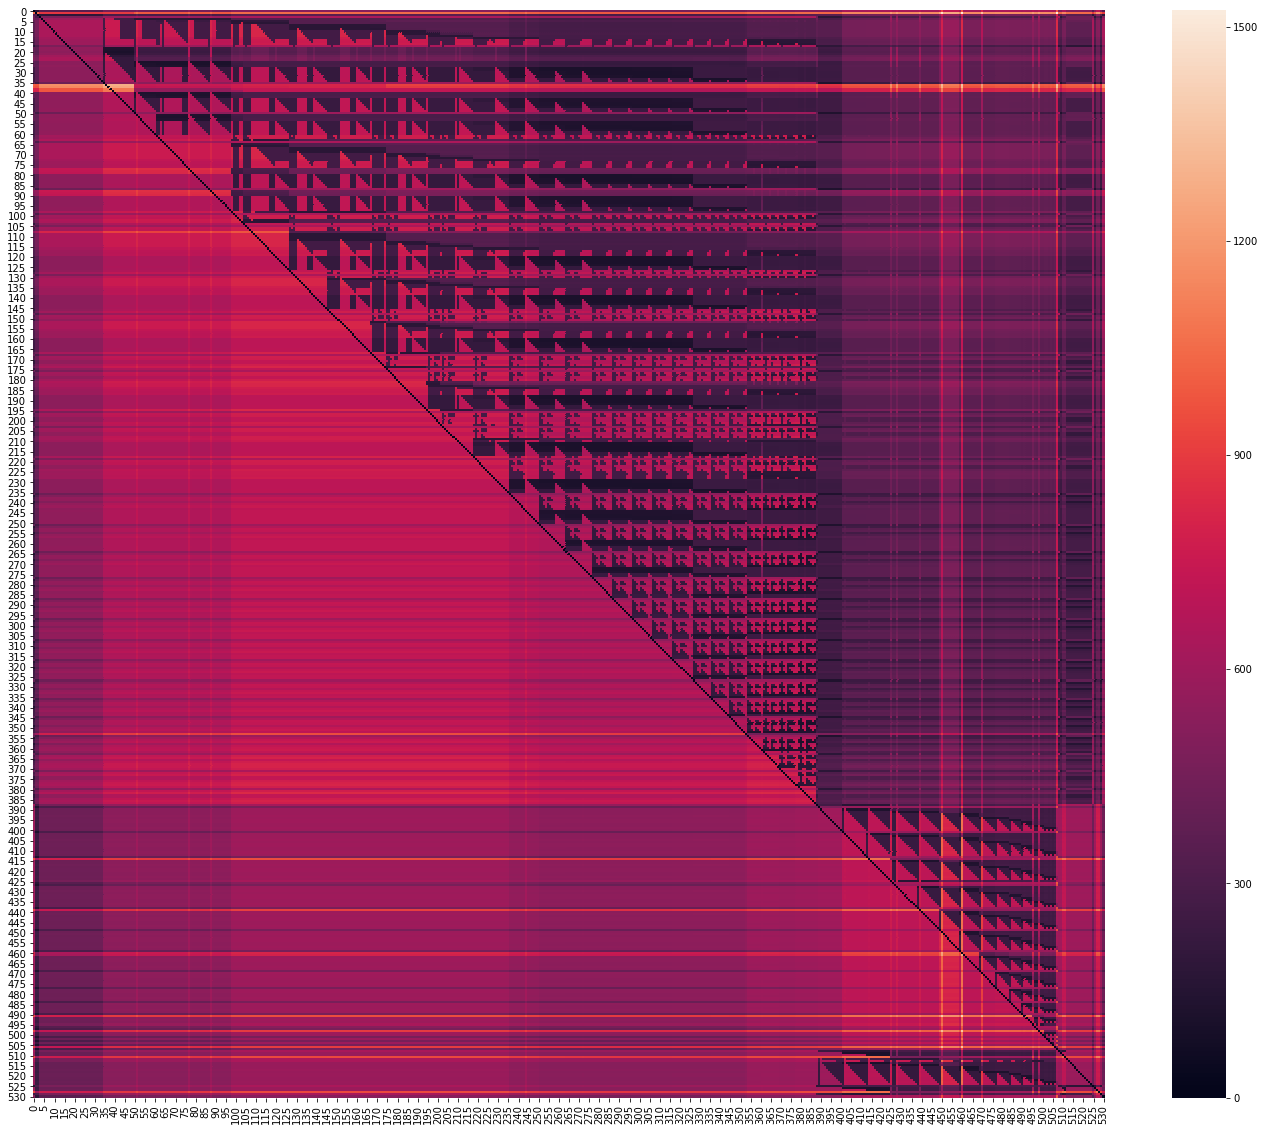

In [4]:
import pylab as plt

plot_matrix = matrix.copy()
plot_matrix[plot_matrix == inf] = 10000
plot_matrix = np.nan_to_num(plot_matrix)

fig = plt.figure(figsize=(24,20))
ax = fig.gca()
step = 1
sns.heatmap(plot_matrix[::step, ::step], ax=ax)

In [5]:
import numpy as np

cycles = []
paths = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix[i]):
        a = matrix[i, j]
        b = matrix[j, i]
        if i == j:
            continue

        anode = nodelist[i]
        bnode = nodelist[j]
        if a != np.inf:
            paths.append((anode, bnode, a))
        if b != np.inf:
            paths.append((bnode, anode, b))
        if a != np.inf and b != np.inf:
            cycles.append((anode, bnode, a, b, a + b))


cycles = sorted(cycles, key=lambda c: c[-1])
print("Cycles: {}".format(len(cycles)))
print("Paths: {}".format(len(paths)))

Cycles: 281430
Paths: 562860


In [6]:
for c in cycles[:10]:
    print(c)

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 178.0, 171.66666666666666, 349.66666666666663)
("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 171.66666666666666, 178.0, 349.66666666666663)
("(5947, 9408, 1, 'PCR_PRODUCT')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 178.33333333333331, 299.66666666666663, 477.99999999999994)
("(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(5947, 9408, 1, 'PCR_PRODUCT')", 299.66666666666663, 178.33333333333331, 477.99999999999994)
("(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(5947, 0, 1, 'PCR_PRODUCT')", 299.66666666666663, 178.33333333333331, 477.99999999999994)
("(5947, 0, 1, 'PCR_PRODUCT')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 178.33333333333331, 299.66666666666663, 477.99999999999994)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 9408, 1, 'PCR_PRODUCT')", 178.0, 300.0, 478.0)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 356.3333333333333, 121.6

In [1]:
from more_itertools import pairwise

for c in cycles[:20]:
    print(c)
    path1 = nx.shortest_path(G, c[0], c[1], weight='weight')
    path2 = nx.shortest_path(G, c[1], c[0], weight='weight')
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        edata = G[n1][n2]
        print('{} {} {} {} > {}'.format(edata['weight'], edata['name'], edata['span_length'], n1, n2))
    print()

NameError: name 'cycles' is not defined

In [171]:
for n in list(G.nodes())[:100]:
    print(n)

(0, 4219, 1, 'PCR_PRODUCT')
(4227, 4261, 1, 'PCR_PRODUCT')
(4227, 5920, 1, 'PCR_PRODUCT')
(5947, 9408, 1, 'PCR_PRODUCT')
(5947, 7182, 1, 'PCR_PRODUCT')
(5947, 7297, 1, 'PCR_PRODUCT')
(5947, 7355, 1, 'PCR_PRODUCT')
(5947, 7527, 1, 'PCR_PRODUCT')
(5947, 7528, 1, 'PCR_PRODUCT')
(5947, 7570, 1, 'PCR_PRODUCT')
(5947, 8177, 1, 'PCR_PRODUCT')
(5947, 8248, 1, 'PCR_PRODUCT')
(5947, 8325, 1, 'PCR_PRODUCT')
(5947, 8508, 1, 'PCR_PRODUCT')
(5947, 9210, 1, 'PCR_PRODUCT')
(5947, 9224, 1, 'PCR_PRODUCT')
(5947, 9255, 1, 'PCR_PRODUCT')
(5947, 9407, 1, 'PCR_PRODUCT')
(5947, 5980, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6002, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6041, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6082, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6106, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6246, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6268, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7205, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7219, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(594

In [35]:
import xarray as xr
import numpy as np
data = xr.DataArray(np.random.randn(3, 3), dims=('x', 'y'), coords={'x': [10, 20, 30]})

In [54]:
min_span = -300
max_span = 500

span = np.arange(-300, 500, dtype=np.int64)
ext = span - 16